# Build NJ trees with AvePla samples

In [1]:
## Add paths
.libPaths("/nfs/scistore18/bartogrp/apal/R/x86_64-pc-linux-gnu-library/4.3")

## Load packages
library("ape")
library("phangorn")
library("tictoc")
library("parallel")
library("data.table")

## Set wrodking directory
setwd("~/snap_hap_repHZ/NJ_trees")


Attaching package: ‘data.table’


The following object is masked from ‘package:tictoc’:

    shift




## Convert VCF to Phylip format

In [ ]:
## %bash
# inVCF=~/snap_hap_repHZ/Stitch/AvePla.FrYe.stitch.SnpOnly.final.sorted.vcf.gz 
# time python ~/_softwares/vcf2phylip.py -i $inVCF 

## Read data

In [4]:
## Read PHYLIP file
tic()
n74 <- read.phyDat("~/snap_hap_repHZ/NJ_trees/AvePla.FrYe.stitch.SnpOnly.final.sorted.min4.phy", format = "phylip", type = "dna")
toc()

467.199 sec elapsed


In [5]:
str(n74)

List of 74
 $ n96_Am_Ave_x3318_v3.5: int [1:10531204] 3 1 3 3 1 1 1 1 3 1 ...
 $ n96_Am_Ave_x3327_v3.5: int [1:10531204] 3 1 3 3 1 1 1 2 3 1 ...
 $ n96_Am_Ave_x3333_v3.5: int [1:10531204] 7 2 9 7 8 1 6 6 3 1 ...
 $ n96_Am_Ave_x3394_v3.5: int [1:10531204] 1 2 2 1 4 1 1 1 4 4 ...
 $ n96_Am_Ave_x4101_v3.5: int [1:10531204] 1 2 2 1 4 1 1 6 3 1 ...
 $ n96_Am_Ave_x4102_v3.5: int [1:10531204] 1 2 2 1 4 1 1 1 3 1 ...
 $ n96_Am_Ave_x4116_v3.5: int [1:10531204] 7 6 9 7 8 1 1 1 3 1 ...
 $ n96_Am_Ave_x4161_v3.5: int [1:10531204] 7 6 9 7 8 1 1 1 3 1 ...
 $ n96_Am_Ave_x4178_v3.5: int [1:10531204] 7 6 9 7 8 1 1 1 3 1 ...
 $ n96_Am_Ave_x4359_v3.5: int [1:10531204] 7 6 9 7 8 1 1 1 3 1 ...
 $ n96_Am_Ave_x4429_v3.5: int [1:10531204] 7 6 9 7 8 1 1 1 11 8 ...
 $ n96_Am_Ave_x4459_v3.5: int [1:10531204] 7 6 9 7 8 1 1 1 3 1 ...
 $ n96_Am_Ave_x4585_v3.5: int [1:10531204] 3 1 3 3 1 1 1 1 3 1 ...
 $ n96_Am_Ave_x4593_v3.5: int [1:10531204] 3 1 3 3 1 1 1 1 4 4 ...
 $ n96_Am_Ave_x4608_v3.5: int [1:10531204] 3 6 3 3

In [27]:
samples <- read.table("~/snap_hap_repHZ/samples/samples.AvePla.FrYe.n74.sortedLong.info", header = T)
str(samples)

'data.frame':	74 obs. of  7 variables:
 $ PlantID   : chr  "n96_Am_Pla_z2711_v3.5" "n96_Am_Pla_z2008_v3.5" "n96_Am_Pla_z0347_v3.5" "n96_Am_Pla_z3891_v3.5" ...
 $ Pool      : chr  "Pla_Y" "Pla_Y" "Pla_Y" "Pla_Y" ...
 $ HZ        : chr  "Pla" "Pla" "Pla" "Pla" ...
 $ ID        : int  67 63 58 68 65 73 71 69 59 70 ...
 $ Long      : num  2.06 2.06 2.06 2.06 2.06 ...
 $ Color_Pool: chr  "blue" "blue" "blue" "blue" ...
 $ Color_HZ  : chr  "red" "red" "red" "red" ...


## Neighbour-joining tree

224.98 sec elapsed


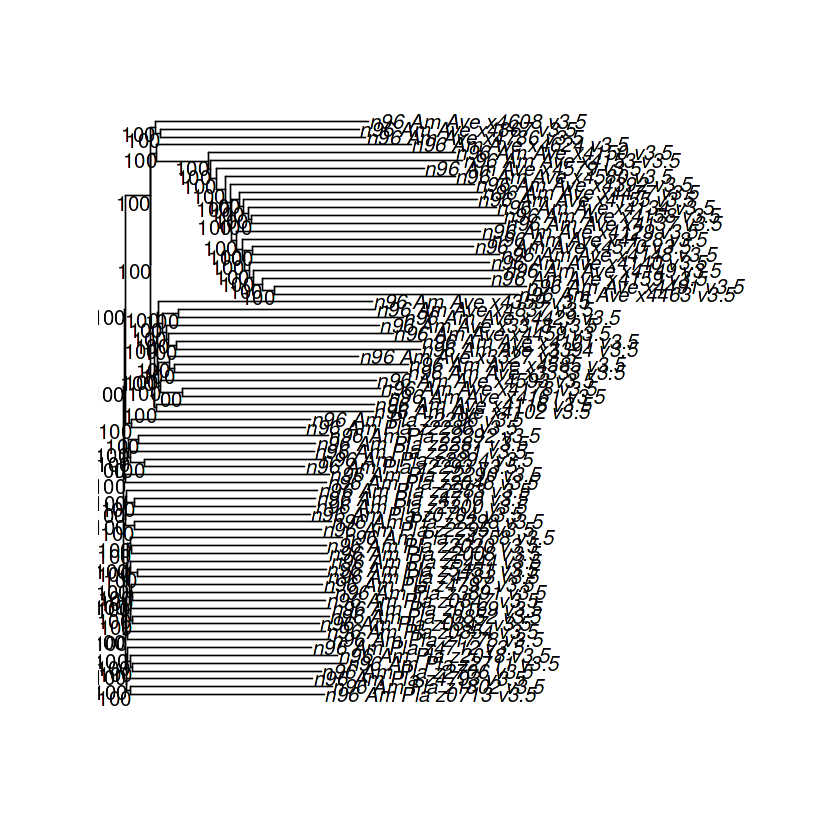

In [7]:
## Construct distance matrix
dm_n74 <- dist.ml(n74, model = "JC69")

## Neighbour-Joining tree with bootstrapping
tic()
treeNJ_n74 <- NJ(dm_n74)
bootstrapNJ_n74 <- bootstrap.phyDat(n74, 
                                 FUN = function(x){NJ(dm_n74)}, 
                                 bs = 100)
toc()
treeNJ_n74 <- plotBS(treeNJ_n74, bootstrapNJ_n74, "phylogram")

In [8]:
str(treeNJ_n74)

List of 5
 $ edge       : int [1:145, 1:2] 120 120 113 113 142 142 140 140 138 138 ...
 $ edge.length: num [1:145] 0.07367 0.07133 0.00185 0.07665 0.09076 ...
 $ tip.label  : chr [1:74] "n96_Am_Ave_x3318_v3.5" "n96_Am_Ave_x3327_v3.5" "n96_Am_Ave_x3333_v3.5" "n96_Am_Ave_x3394_v3.5" ...
 $ Nnode      : int 72
 $ node.label : num [1:72] 100 100 100 100 100 100 100 100 100 100 ...
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "postorder"


In [9]:
write.tree(treeNJ_n74, "treeNJ_AvePla.n74.tree")

In [17]:
samples[match(treeNJ_n74$tip.label, samples$PlantID),]$colour_HZ

NULL

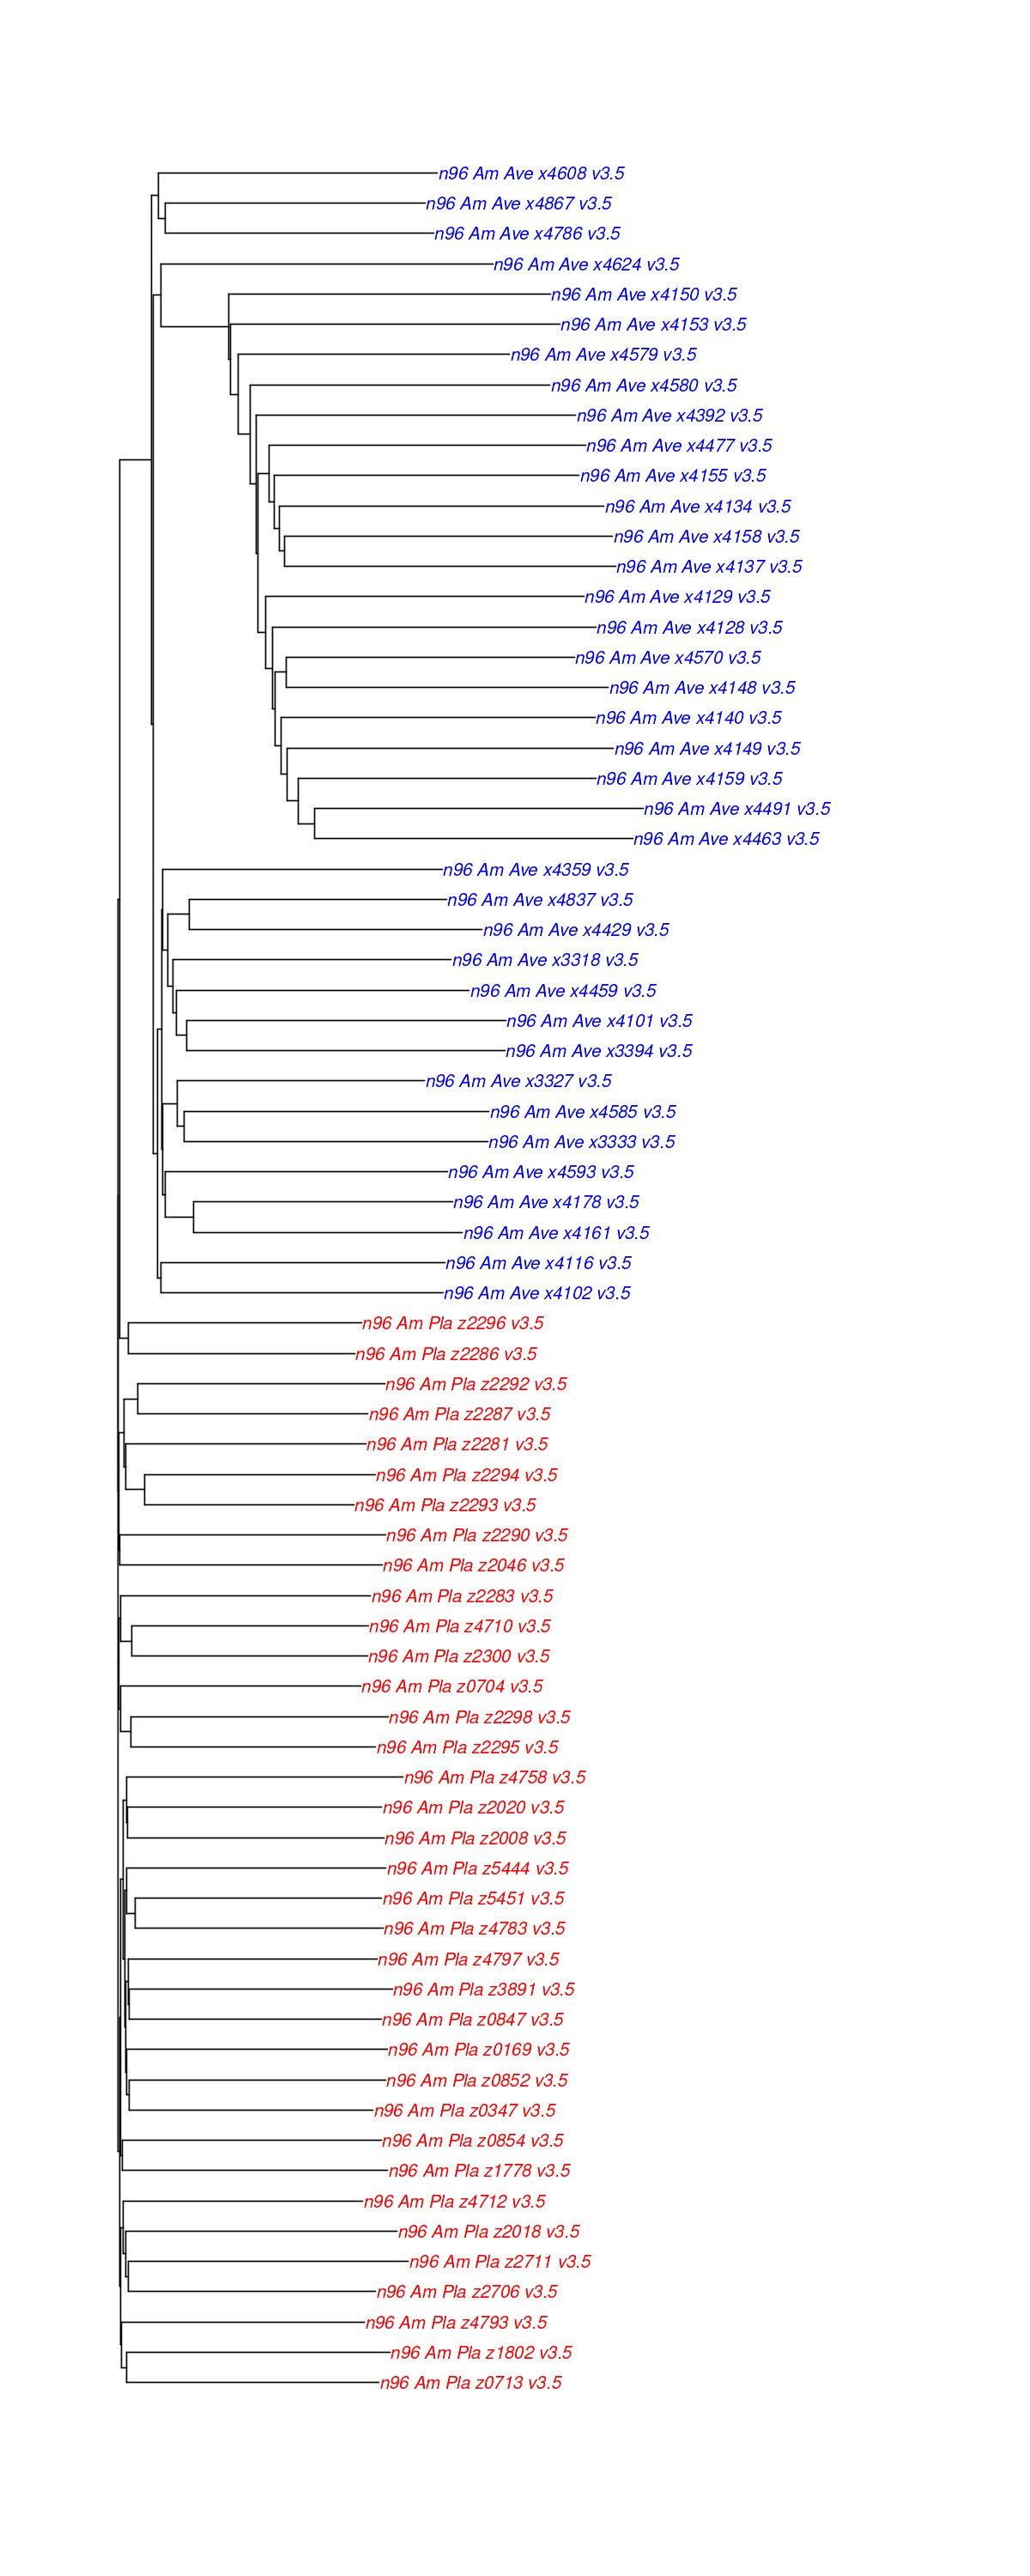

In [28]:
options(repr.plot.width=10, repr.plot.height=25)
treeNJ_n74.tip.colour <- samples[match(treeNJ_n74$tip.label, samples$PlantID),]$Color_HZ
plot(treeNJ_n74, 
     tip.color = treeNJ_n74.tip.colour, 
     cex = 1)

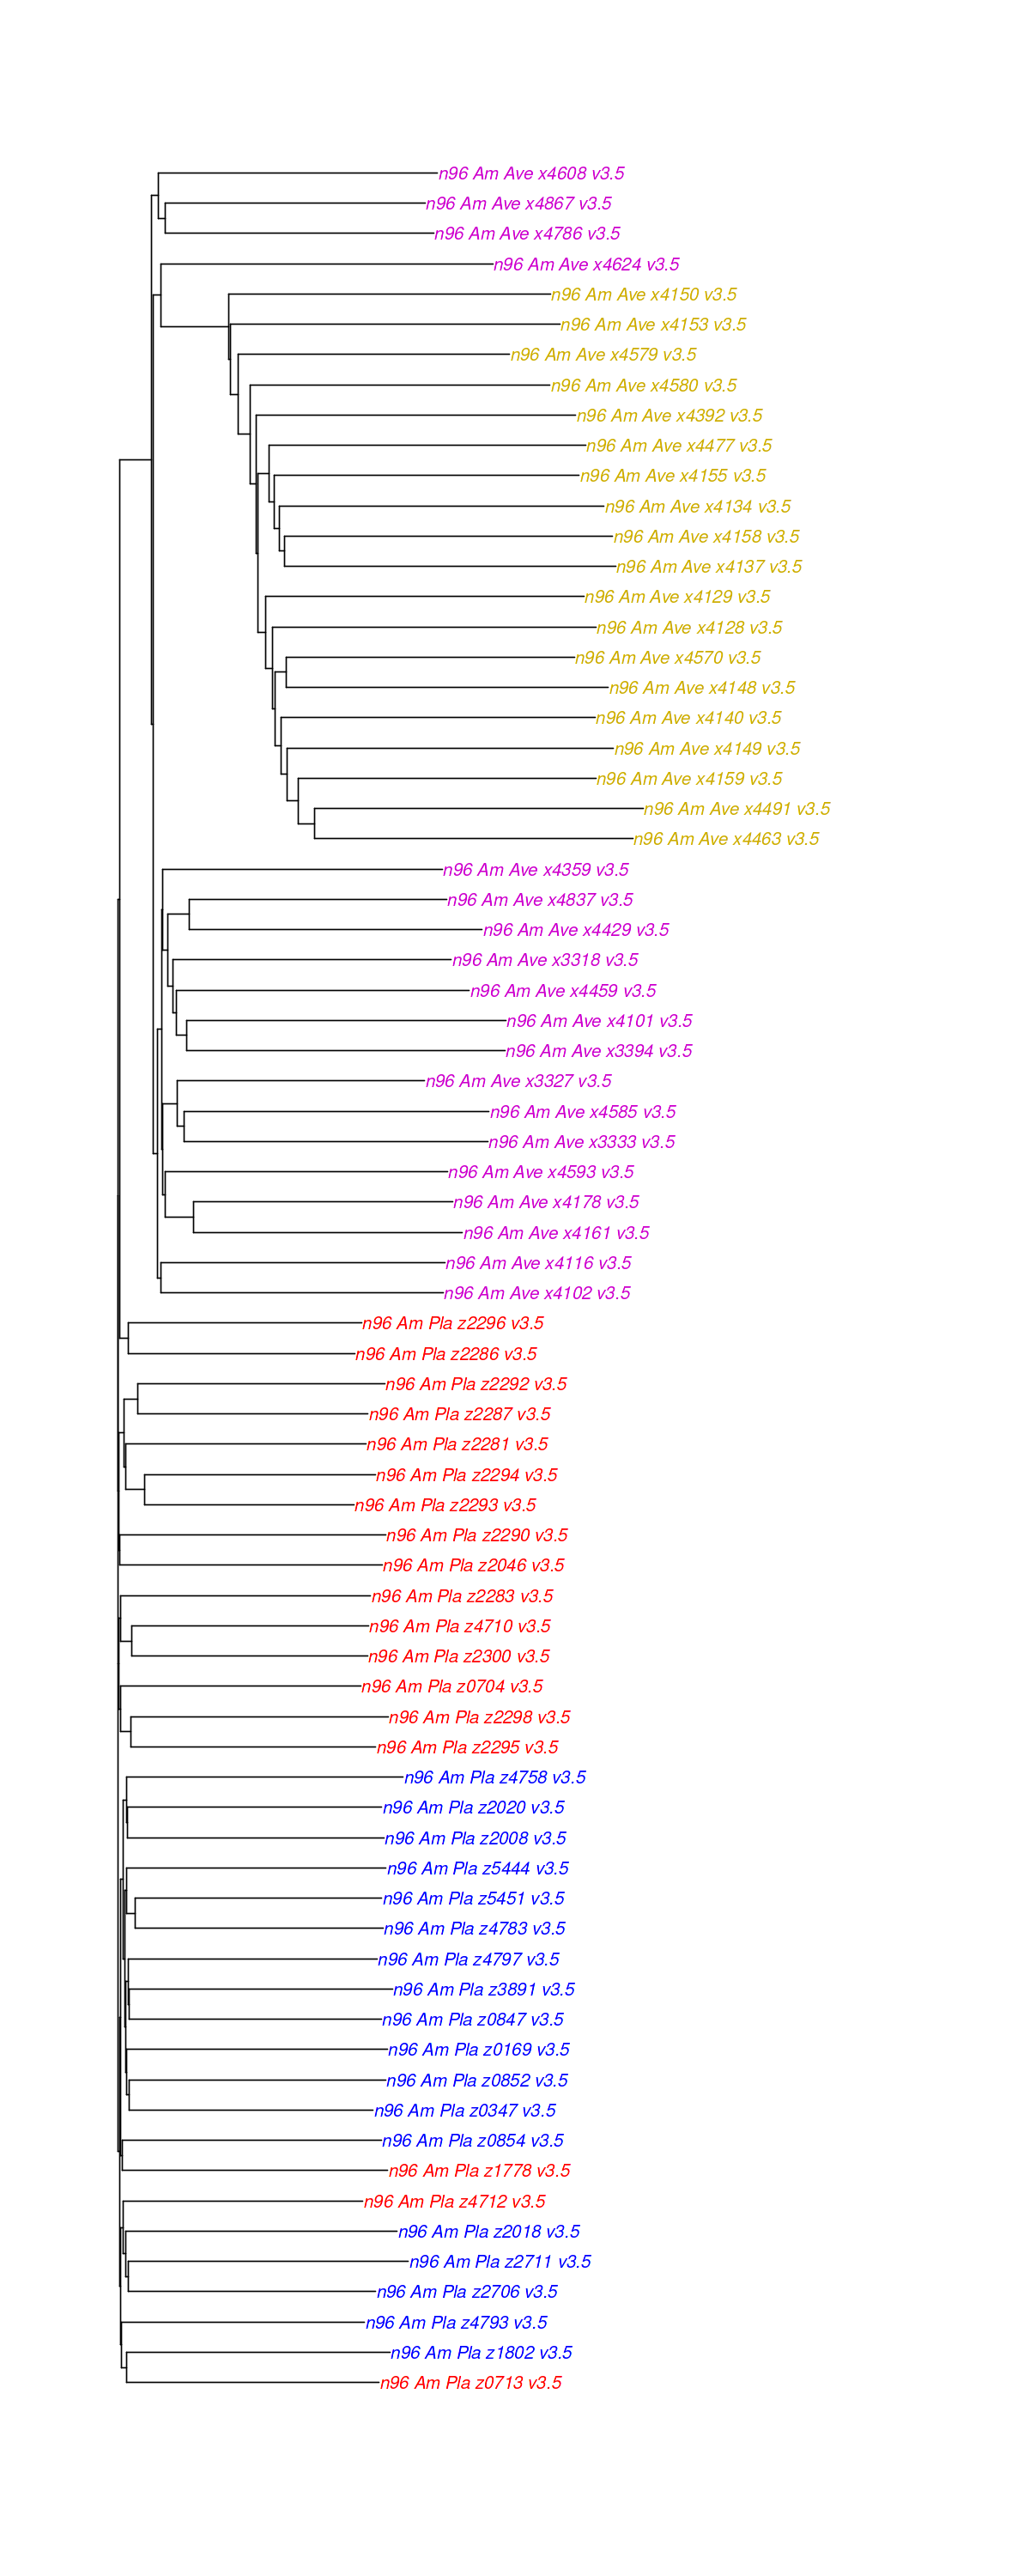

In [29]:
options(repr.plot.width=10, repr.plot.height=25)
treeNJ_n74.tip.colour <- samples[match(treeNJ_n74$tip.label, samples$PlantID),]$Color_Pool
plot(treeNJ_n74, 
     tip.color = treeNJ_n74.tip.colour, 
     cex = 1)

## NeighbourNet

In [21]:
tic()
nNet_n74 <- neighborNet(dm_n74)
toc()

45.647 sec elapsed


In [22]:
str(nNet_n74)

List of 6
 $ edge       : int [1:1425, 1:2] 75 75 75 75 76 76 76 77 77 77 ...
 $ tip.label  : chr [1:74] "n96_Am_Pla_z4712_v3.5" "n96_Am_Pla_z2018_v3.5" "n96_Am_Pla_z2711_v3.5" "n96_Am_Pla_z2706_v3.5" ...
 $ Nnode      : int 744
 $ splitIndex : int [1:1425] 209 207 202 187 208 202 187 205 202 192 ...
 $ edge.length: num [1:1425] 0.001095 0.000339 0.000121 0.000184 0.006581 ...
 $ splits     :List of 209
  ..$ : int 1
  ..$ : int 2
  ..$ : int 3
  ..$ : int 4
  ..$ : int 5
  ..$ : int 6
  ..$ : int 7
  ..$ : int 8
  ..$ : int 9
  ..$ : int 10
  ..$ : int 11
  ..$ : int 12
  ..$ : int 13
  ..$ : int 14
  ..$ : int 15
  ..$ : int 16
  ..$ : int 17
  ..$ : int 18
  ..$ : int 19
  ..$ : int 20
  ..$ : int 21
  ..$ : int 22
  ..$ : int 23
  ..$ : int 24
  ..$ : int 25
  ..$ : int 26
  ..$ : int 27
  ..$ : int 28
  ..$ : int 29
  ..$ : int 30
  ..$ : int 31
  ..$ : int 32
  ..$ : int 33
  ..$ : int 34
  ..$ : int 35
  ..$ : int 36
  ..$ : int 37
  ..$ : int 38
  ..$ : int 39
  ..$ : int 40
  

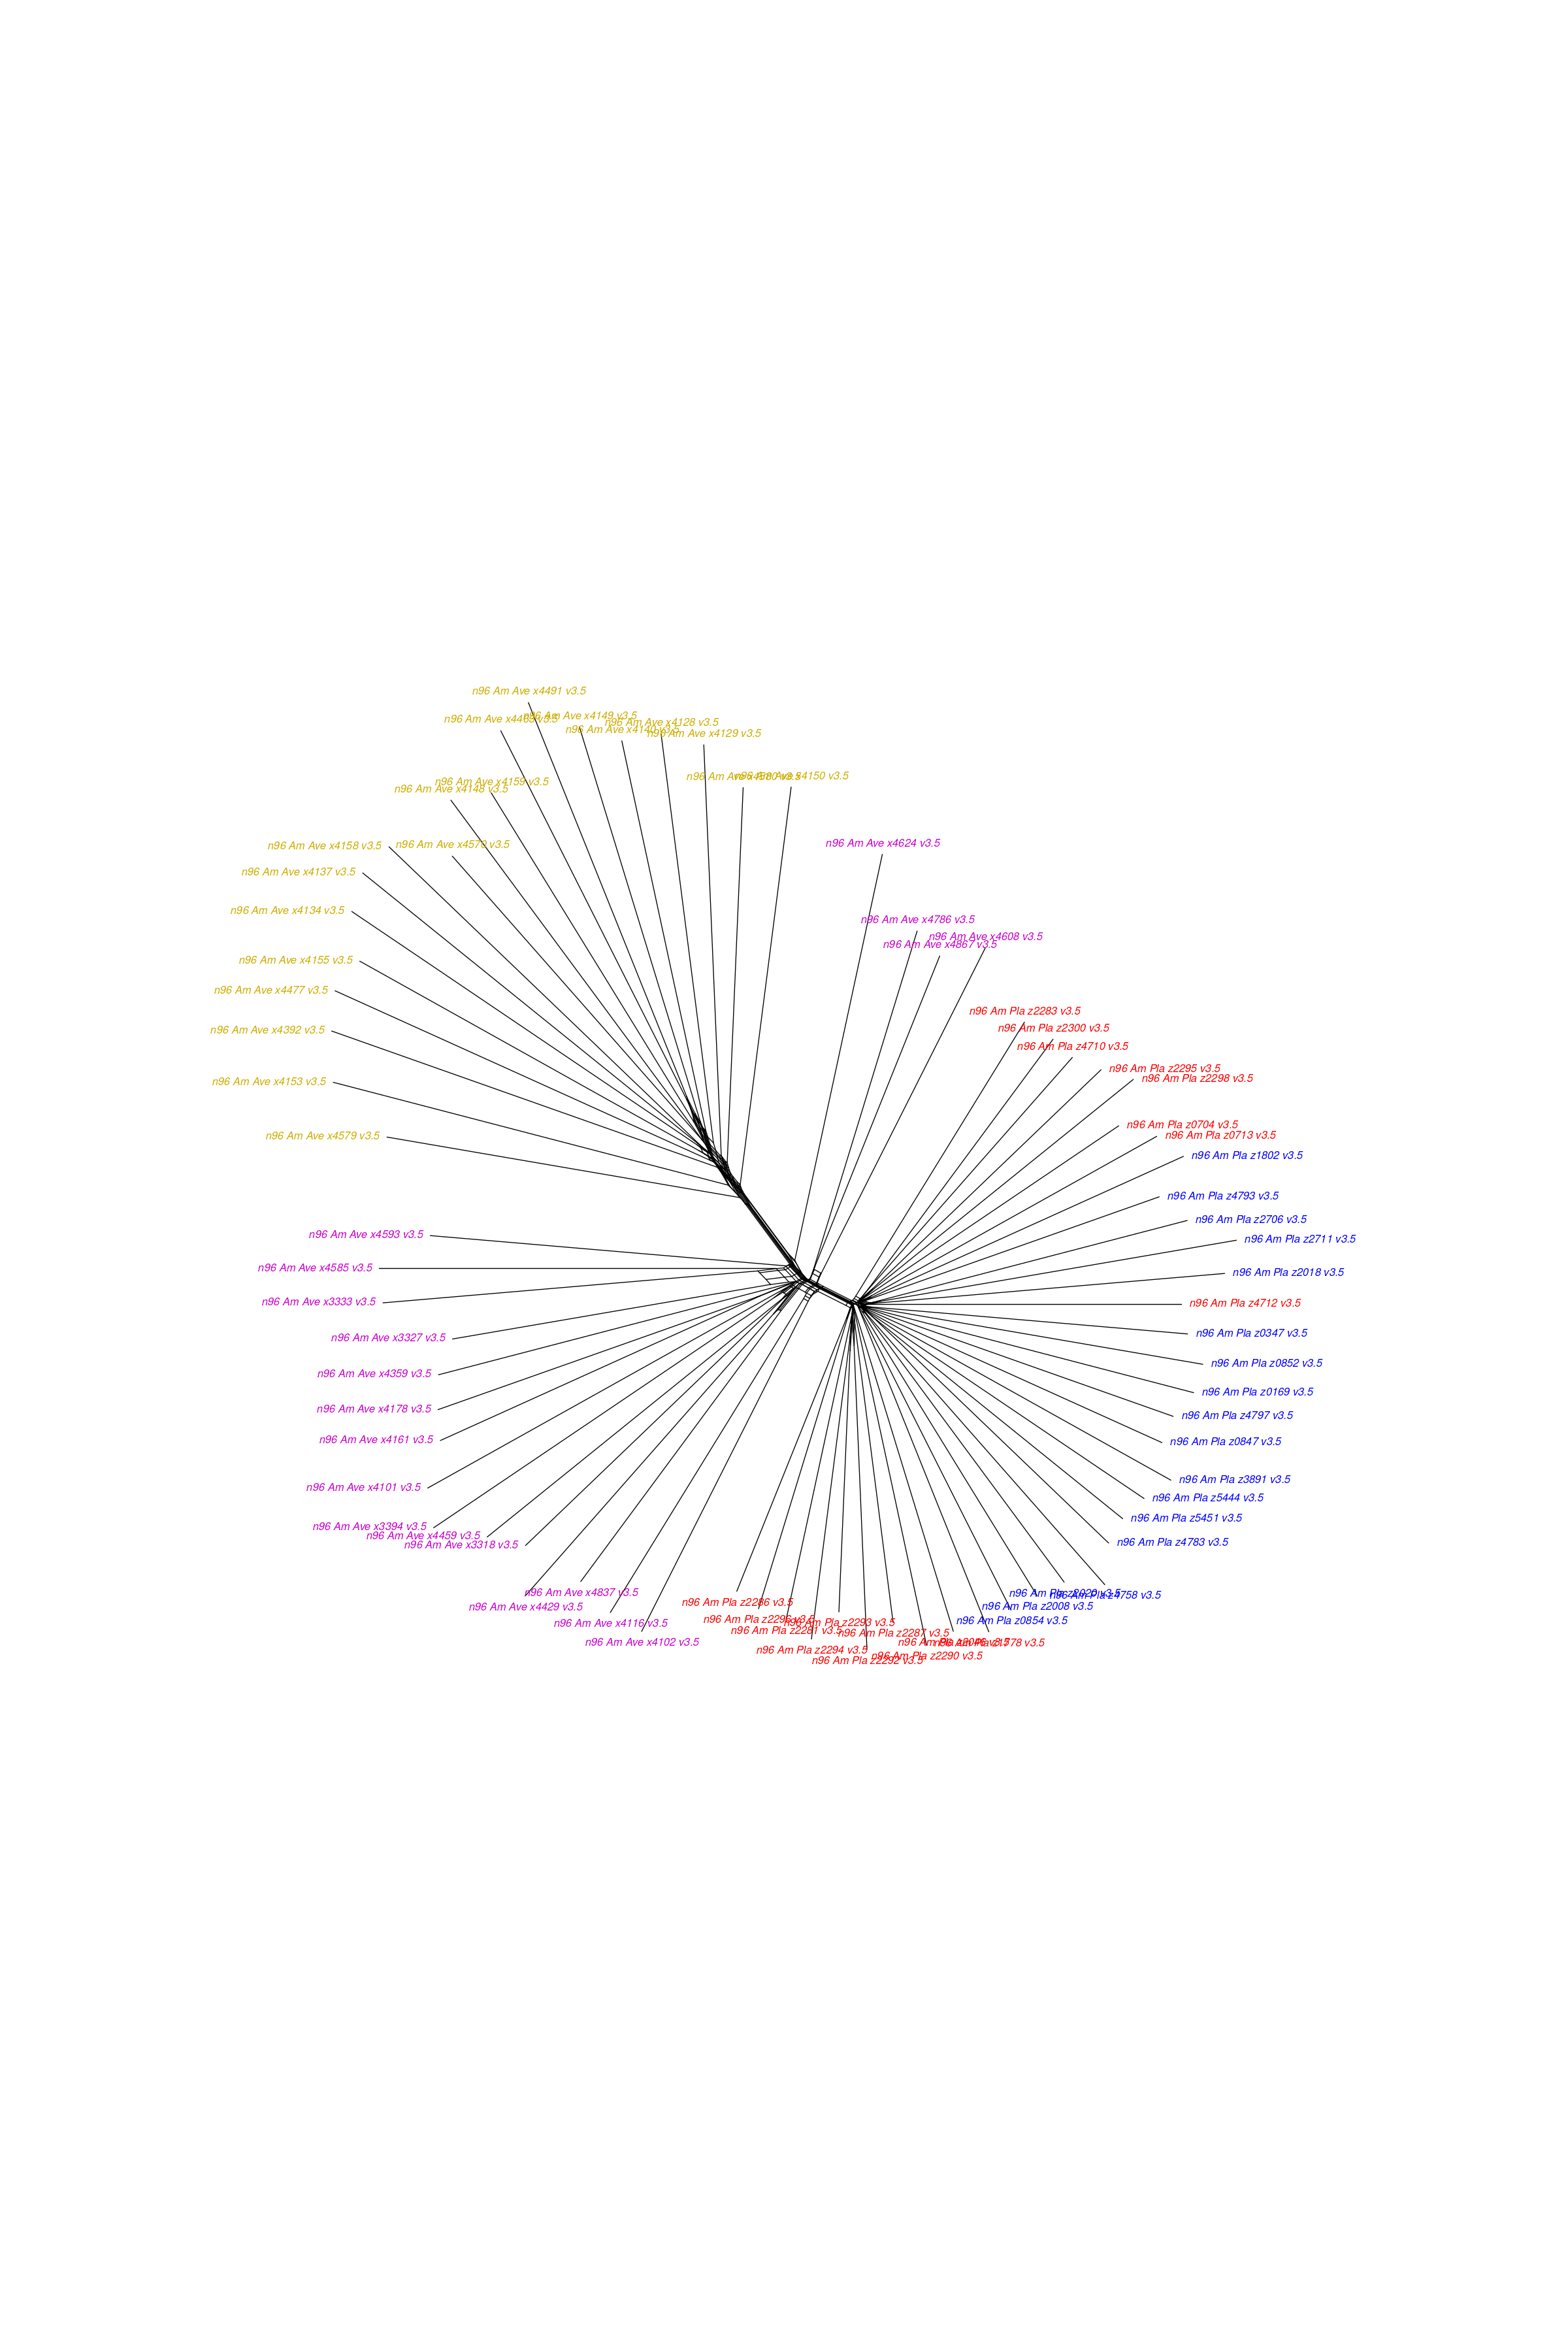

In [30]:
options(repr.plot.width=20, repr.plot.height=30)
nNet_n74.tip.colour <- samples[match(nNet_n74$tip.label, samples$PlantID),]$Color_Pool
par(mar = c(0,0,0,0))
plot(nNet_n74, cex = 0.8, edge.width = 0.8, use.edge.length = T, tip.color = nNet_n74.tip.colour, no.margin = TRUE)

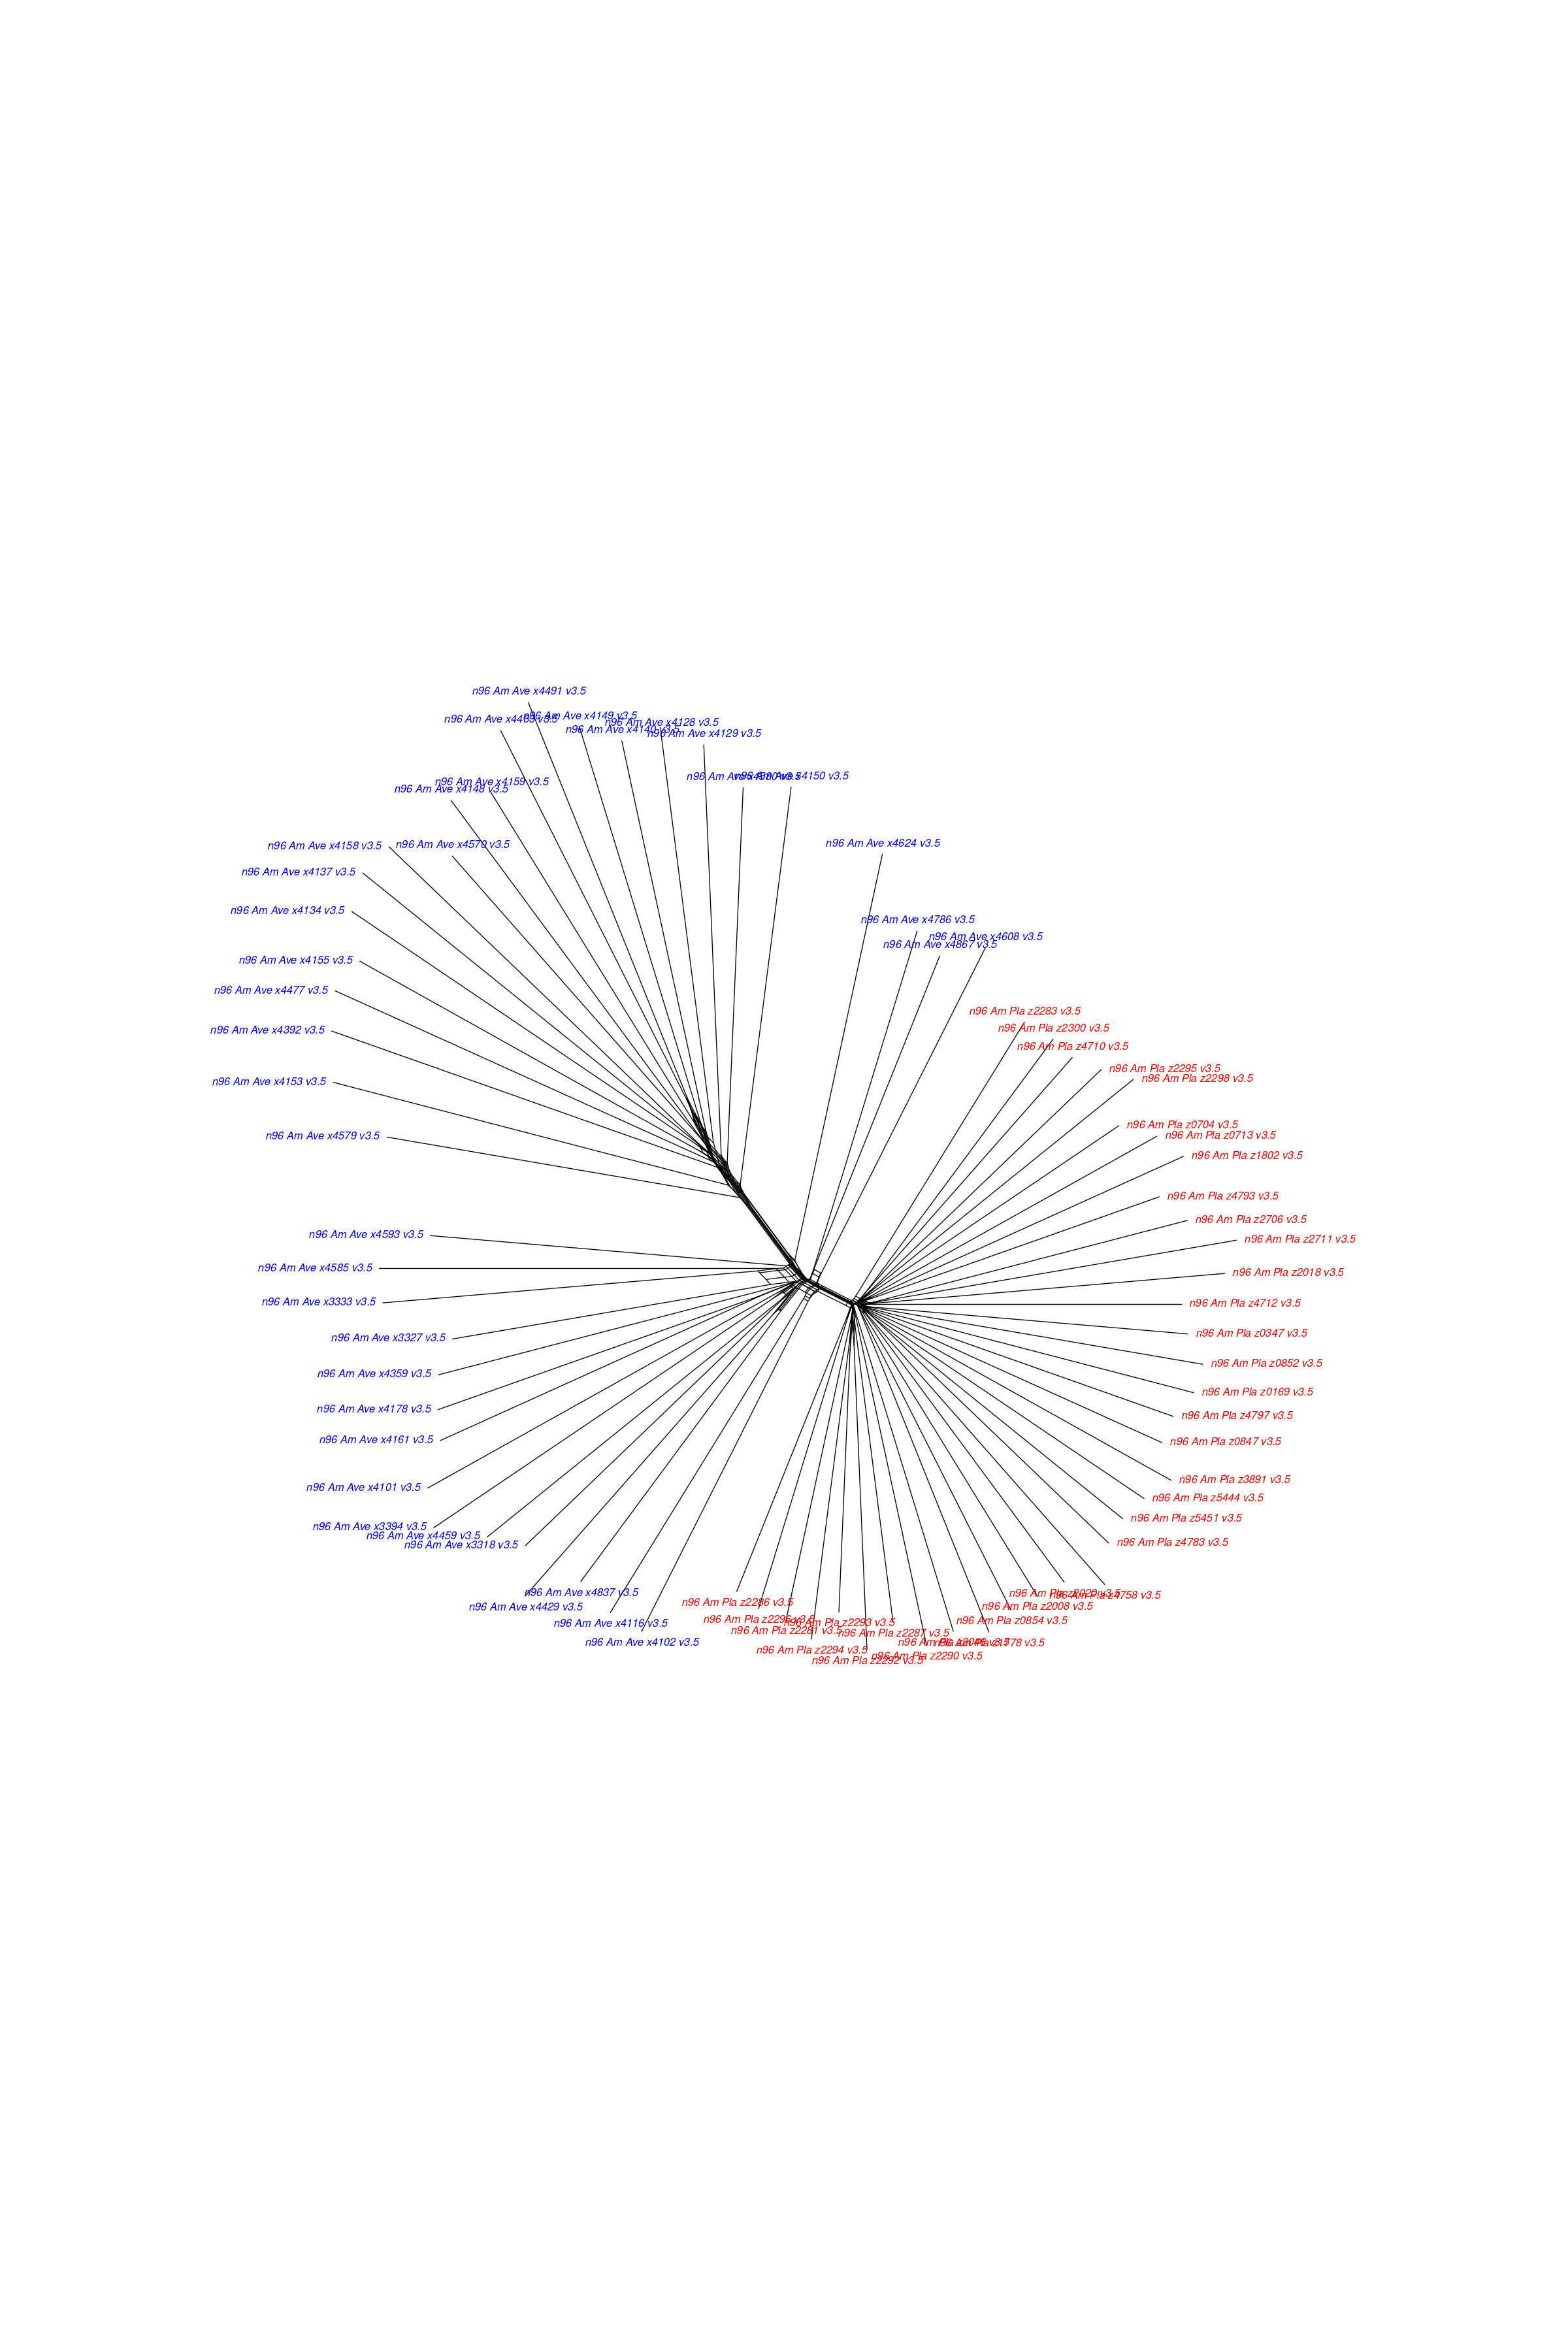

In [31]:
options(repr.plot.width=20, repr.plot.height=30)
nNet_n74.tip.colour <- samples[match(nNet_n74$tip.label, samples$PlantID),]$Color_HZ
par(mar = c(0,0,0,0))
plot(nNet_n74, cex = 0.8, edge.width = 0.8, use.edge.length = T, tip.color = nNet_n74.tip.colour, no.margin = TRUE)

In [25]:
## Add branch support values from the NJ tree onto neighbourNet network
nNet_n74_conf <- addConfidences(nNet_n74, treeNJ_n74)

In [26]:
## Write neighbourNet network
write.nexus.networx(nNet_n74_conf, file = "nNet_AvePla.n74.nex", taxa = TRUE, splits = TRUE, append = FALSE)